# Imports

In [2]:
import time
import pynlo
from load_data import load_data
from generate_data import generate_data
from train_models import train_models, train_best

# Generate data
`generate_data()` runs `PyNLO` for each given parameter and saves the temporal/spectral inputs/output evolution in `DATA_DIR`

In [3]:
DATA_DIR = f"./testing_data/nlse_time-{int(time.time())}/"
LOG_DIR = "logs/"

generate_data(DATA_DIR)

  3%|▎         | 1/32 [00:17<08:50, 17.11s/it]

# Train models
`keras.tuner.RandomSearch()` iterates randomly over hyperparameters and runs a model for each. `train_models()` runs a given amount of these models and returns the best one. `train_best()` immediately follows, training and returning the best performing model. 

In [2]:
# for testing
# DATA_DIR = "./testing_data/nlse_time-1657843201/"
# LOG_DIR = "logs/"

x_train, y_train, x_val, y_val, x_test, y_test = load_data(
    DATA_DIR=DATA_DIR, 
    validation_split=0.2, 
    test_split=0.2
)

Input data shape: (1024, 10, 1024)
Output data shape: (1024, 110, 1024)


In [3]:
tuner, hps = train_models(
    DATA_DIR=DATA_DIR, 
    LOG_DIR=LOG_DIR, 
    x_train=x_train, 
    y_train=y_train, 
    validation_data=(x_val, y_val), 
    epochs=10, 
    batch_size=32
)

Trial 1 Complete [00h 00m 42s]
mse: 2.830995617841836e-05

Best mse So Far: 2.830995617841836e-05
Total elapsed time: 00h 00m 42s
INFO:tensorflow:Oracle triggered exit


Epoch 1/10
20/20 [==============================] - 5s 171ms/step - loss: 0.2497 - mse: 0.2497 - mae: 0.4997
Epoch 2/10
20/20 [==============================] - 3s 172ms/step - loss: 0.2494 - mse: 0.2494 - mae: 0.4993
Epoch 3/10
20/20 [==============================] - 4s 178ms/step - loss: 0.2489 - mse: 0.2489 - mae: 0.4989
Epoch 4/10
20/20 [==============================] - 4s 179ms/step - loss: 0.2481 - mse: 0.2481 - mae: 0.4980
Epoch 5/10
20/20 [==============================] - 4s 213ms/step - loss: 0.2408 - mse: 0.2408 - mae: 0.4906
Epoch 6/10
20/20 [==============================] - 3s 168ms/step - loss: 0.0969 - mse: 0.0969 - mae: 0.2574
Epoch 7/10
20/20 [==============================] - 4s 187ms/step - loss: 2.8699e-05 - mse: 2.8699e-05 - mae: 3.6252e-04
Epoch 8/10
20/20 [==============================] - 3s 171ms/step - loss: 2.8310e-05 - mse: 2.8310e-05 - mae: 2.5179e-04
Epoch 9/10
20/20 [==============================] - 4s 180ms/step - loss: 2.8310e-05 - mse: 2.8310e-05 -

KeyError: 'val_mse'

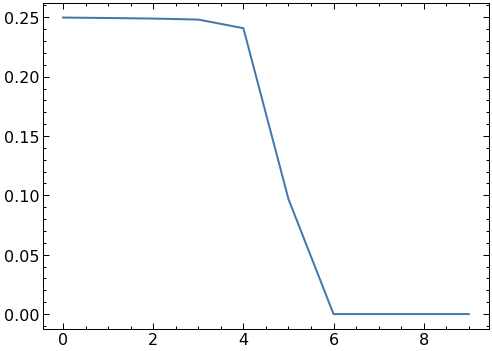

In [7]:
model = train_best(
    DATA_DIR=DATA_DIR, 
    LOG_DIR=LOG_DIR, 
    x_train=x_train, 
    y_train=y_train, 
    validation_data=(x_val, y_val), 
    tuner=tuner, 
    hps=hps, 
    epochs=10
)

# Make predictions
Makes a prediction with the best performing model on a data set that is outside the initial training data.

## Generate pulse

In [9]:
# Parameters
fwhm = 0.18
wl = 1030
window = 10.0
gdd = 0
tod = 0
points = 2**10
frep = 1
epp = 50e-12

pulse = pynlo.light.DerivedPulses.SechPulse(
    power=1,
    T0_ps=fwhm / 1.76,
    center_wavelength_nm=wl,
    time_window_ps=window,
    GDD=gdd,
    TOD=tod,
    NPTS=points,
    frep_MHz=frep,
    power_is_avg=False,
)
pulse.set_epp(epp)

model.predict()

NameError: name 'pynlo' is not defined

In [ ]:
    test_pulse, freqs = get_pulse()
    prediction = model.predict(test_pulse)
    ev = freqs * 0.004136  # THz to eV

    plt.style.use(["science", "nature", "bright"])

    _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

    ax1.plot(ev, np.absolute(np.transpose(test_pulse[0, :])))
    ax1.set_xlabel("Photon energy (eV)")
    ax1.set_title("Prediction input")

    ax2.imshow(prediction[0, :, :], aspect="auto", cmap="jet")
    ax2.set_title("Prediction output")

    ax3.plot(x_train[0, 0, :] / np.max(x_train[0, 0, :]))
    ax3.set_title("Train input")

    ax4.imshow(np.absolute(y_train[0, :, :]), aspect="auto", cmap="jet")
    ax4.set_title("Train output")

    plt.show()

# Plot results